#Long Short Term Memory (LSTM)
Now that are you are aware of the basic RNN model, it's time to get to know better versions of RNN, in all of the state-of-the art RNN models like LSTM or GRU were used.
<br>
In this notebook we will cover: 

1.   Why was LSTM invented?
2. Embedding Layer
3.   LSTM architecture
5.   TensorFlow syntax of the above **layers**
6. Application of LSTM




##Why was LSTM invented?
#### To overcome the problems faced in Deep Neural RNN, LSTM was initially created in the 1980's

What are the problems faced in training a RNN?


*   DNN suffer from something called a *Vanishing Gradient Problem*   <br>
Refer to this vedio linked below from Andrew NG( founded and led *Google Brain*) to get a detailed explanation




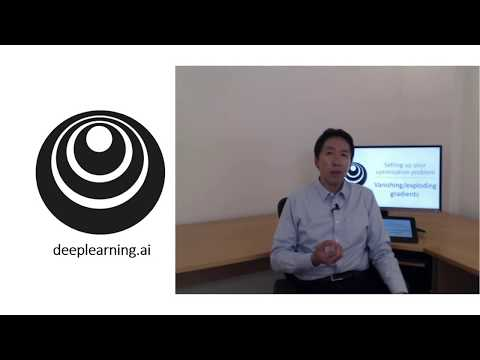

In [ ]:
#@title 
from IPython.display import YouTubeVideo
YouTubeVideo('qhXZsFVxGKo')

*  RNN is good at identifying nearby dependencies, take an example " The *cats* in the home went out to watch movie and *were* having a good time." The *cats* influences the word *were* which is quite far from the word. RNN is not capable of captuing such long term dependencies. Hence LSTM was invented which captures which is obvious by its abbrevation!
* Optimizing a DNN can be tricky, there are too many parameters involved to trace the source of problem.
* Since number of parameters will significantly increase (In Millions!) hence memory requirement will be high and, training and computation time will also significantly increase.

##The Embedding layer<br>

First let us see the syntax and understand things on the go and unravel the black box!







In [ ]:
import tensorflow as tf
input_dim = 12
output_dim = 128
tf.keras.layers.Embedding(input_dim, output_dim)


*   input_dim : It is the (total number of unique words present in the dataset) + 1.  [+1 because an extra token is used to represent words which are not present in the dataset.]
*   output_dim : Let us take few examples to undreastand what this actually represents.<br>



To use models like RNN or LSTM you need to represent a sequence of words in number representation. We can do it in a simple way by using [one hot encoding](https://medium.com/hackernoon/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f#:~:text=One%20hot%20encoding%20is%20a,a%20better%20job%20in%20prediction.&text=The%20categorical%20value%20represents%20the,the%20entry%20in%20the%20dataset.) or *tokenized*( A method in which all the words in the dataset is assigned a number and to tokenize a sentence that corresponding number representation from the assignemnt is assigned to that word in the sentence) or similar methods like that. But it has a major disadvantage i.e it will not be able to learn relationship between words. For example take this : Mother : Daugther || Father : ?.We humans can easily say that it's *son* but with the above representation it is impossible to make such connections. <br>
So to help the model make more sense of the input we pass the representation into something called a ***embedding layer*** which for now you can think of a black box which will magically output a matrix which would have learned relations between words and will be able to predict the word *son*.<br>

Words              | Music             |  Coding            |Badminton
-------------------|------------------ |--------------------|---------------
Body movement      |      0.09         |     0.11           | 0.91
Refreshing         | 0.86              |     0.23           |  0.92
Brain Power        |  0.05             |     0.99           |   0.80

Assume that we have only three words in our dataset *music*,*coding* and *badminton*. Carefully look at the numbers representing each case. 

*   In first row, *badminton* has the hihgest number as it is the activity associated with highest body movement whereas the other two are idle activities.
*   In second row playing, *music* and *badminton* is more refreshing than coding hence higher value.
*   In the third row, we require more brain power while coding and liltle less while playing *badminton* hence a lower number than coding and *music* gets the least.

These are numbers are parameters of the overall model and are trained to get these numbers just like a dense or RNN layer. Also it is not necessary that the number in the matrix should be interpretable like the above one. The layer can have its own interpretation one which is non-interpretable by humans.
<br>
In the above examples, it has three dimentions each representing a meaning.
Therefore output_dim represents the number of dimensions the output matrix will have. Bigger the dimensions better will be the model as it encourages many features and have a beter understanding of the dataset. 

*   input_length : Denotes the length of the sequence that is to be given as input.

####Matrix Dimensions :

*  Input dimension : (batch_size, input_length).
*  Output dimension: (batch_size, input_length, output_dim).



For more information on RNN and LSTM go through this post, one of the best explanation available on internet : 
[LSTM article](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)<br>

#LSTM Architecture

RNN single cell was very simple just the standard NN network. But LSTM has a more complex cell.

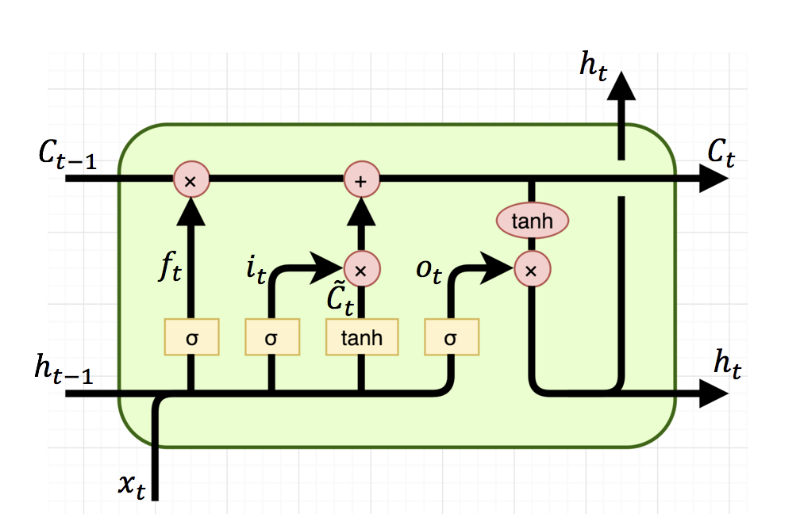

To get more intuition about the topic you can go through this

Don't get overwhelmed by the diagram it's just a series of multiplication and addition. Let's decode it one by one. We will not go into the equations as this is just introduction course and is beyond the scope.<br>
Unlike RNN just passing on the prevoius state there is a *cell state* which carries important information from its prevoius timesteps(past) as well as the prevoius hidden state. This helps to resolve long term dependecies like the one we saw above.
<br>
The **$\sigma$** and ***'ft'*** makes the *Forget gate*, whichdecides what information to keep and discard, as remembering everything from previous past can make the model slow and may have memory constraints.
<br>
Next the update gates updates the cell state for the next timestep.The *tanh* block and*~Ct* makes the update gate.
<br>
The output gate at the end returns the output if required to.

These three gates makes the LSTM work with long sequences!

Go through this lecture if you want more clear picture of RNN and LSTM in general [Stanford lecture](https://www.youtube.com/watch?v=6niqTuYFZLQ&t=259s)

##TensorFlow syntax:<br>


In [ ]:
(tf.keras.layers.LSTM(units = 55,return_sequences =True,return_state=True, time_major=False))


These arguements carries the same functionality of RNN arguements. You can see the better accuracy of the model by switching from RNN tto LSTM.
Refer to [TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM) Document for further info.

#Applications of LSTM

In general when the input data is sequential LSTM does a better job compared to other architectures.

To look at a few applications :

1. Language translation 
    
    Language translation methods existed before LSTM were invented gave good accuracy as well, but with LSTM model the accuracy and the latency reduced significantly. You can train your model to achieve conversion between any 2 languages.

2.  Speech Recognition

    Every time you say *Hey Google* or *Hello Siri*, it can revert back because LSTM got it's back!

3.  Video Recognition

    Given a video to determine what is happening in it, we can use LSTM. You can intutively guess why it works even though this is a computer vision related task, because video is just images layed out sequentially and LSTM thrive at sequential data.

4.  Music Generation

    Yes even I was surprised with this out of the box application! *TensorFlow* has a project called [Magenta](https://magenta.tensorflow.org/) an open source research project. You can go and play around and build your own music.

5. Image captioning

    You input an image and you get a text describing the image content.